# Example Data Science Notebook

This notebook demonstrates basic data analysis workflows.

In [ ]:
import sys
import os
from pathlib import Path


# Add src to path
# sys.path.insert(0, str(Path().resolve().parent / 'src'))

sys.path.append(str(ROOT / "src"))
os.environ["SPARK_LOCAL_DIRS"] = str((ROOT / "spark_tmp").resolve())

import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

from ds.analyzer import DataAnalyzer
from de.load.loader import DataLoader

print("Imports successful!")

Imports successful!


## Load Sample Data

In [3]:
import pandas as pd
import numpy as np

In [10]:
# Create sample data
np.random.seed(42)
data = {
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randn(100),
    'target': np.random.randint(0, 2, 100)
}
df = pd.DataFrame(data)
df.head()

,feature1,feature2,feature3,target
0,0.496714,-1.415371,0.357787,0
1,-0.138264,-0.420645,0.560785,1
2,0.647689,-0.342715,1.083051,1
3,1.523030,-0.802277,1.053802,0
4,-0.234153,-0.161286,-1.377669,0


## Exploratory Data Analysis

In [11]:
analyzer = DataAnalyzer(df)
analyzer.summary_stats()

INFO:ds.analyzer:Initialized DataAnalyzer with 100 rows
INFO:ds.analyzer:Generating summary statistics


,feature1,feature2,feature3,target
count,100.000000,100.000000,100.000000,100.000000
mean,-0.103847,0.022305,0.064896,0.420000
std,0.908168,0.953669,1.084283,0.496045
min,-2.619745,-1.918771,-3.241267,0.000000
25%,-0.600906,-0.805661,-0.655444,0.000000
50%,-0.126956,0.084107,0.097696,0.000000
75%,0.405952,0.538170,0.704437,1.000000
max,1.852278,2.720169,3.852731,1.000000


In [6]:
# Check for missing values
analyzer.check_missing()

INFO:ds.analyzer:Total missing values: 0


feature1    0
feature2    0
feature3    0
target      0
dtype: int64

## Visualizations

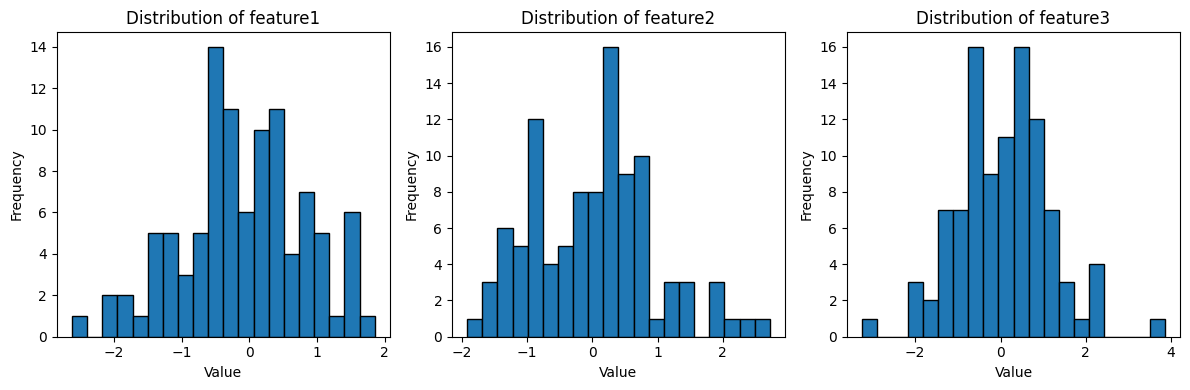

In [7]:
# Distribution plot
plt.figure(figsize=(12, 4))
for i, col in enumerate(['feature1', 'feature2', 'feature3'], 1):
    plt.subplot(1, 3, i)
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

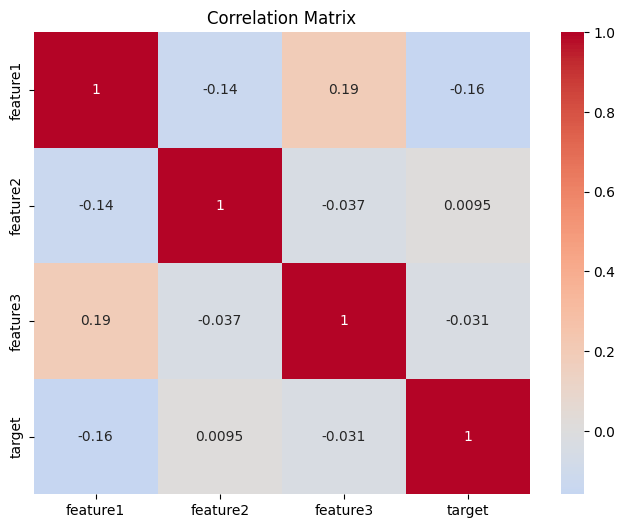

In [8]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Prepare Data for ML

In [9]:
X_train, X_test, y_train, y_test = analyzer.prepare_features('target')
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

INFO:ds.analyzer:Preparing features with target: target
INFO:ds.analyzer:Training set size: 80, Test set size: 20


Training set size: 80
Test set size: 20


In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import (
    col,
    expr,
    lower,
    regexp_replace,
    to_timestamp,
)
from pathlib import Path

from src.common.config import RAW_DIR
from src.de.spark_jobs.traffy_basic_etl import main

RAW_FILE = Path("../data/raw/bangkok_traffy.csv")
OUTPUT_DIR = Path("../data/preprocessed/traffy_cleaned_parquet")

In [11]:
import os, sys
from pathlib import Path

ROOT = Path.cwd().parent
sys.path.append(str(ROOT / "src"))
os.environ["SPARK_LOCAL_DIRS"] = str((ROOT / "spark_tmp").resolve())

from src.de.spark_jobs import traffy_basic_etl as etl

etl.main()


JAVA_HOME is not set


PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

In [ ]:
from pathlib import Path
out = Path("data/processed/traffy_cleaned_parquet")
if out.exists():
    if out.is_file():
        out.unlink()
    else:
        import shutil
        shutil.rmtree(out)


In [12]:
import os, sys
from pathlib import Path

ROOT = Path.cwd().parent
sys.path.append(str(ROOT / "src"))
os.environ["SPARK_LOCAL_DIRS"] = str((ROOT / "spark_tmp").resolve())

from pyspark.sql import SparkSession
from de.spark_jobs.traffy_flood_etl import run_traffy_flood_etl

if __name__ == "__main__":
    spark = (
        SparkSession.builder
        .appName("TraffyFloodETL")
        .getOrCreate()
    )

    INPUT = f"{ROOT}/data/raw/bangkok_traffy.csv"
    CLEANED_OUT = f"{ROOT}/data/processed/traffy_clean.parquet"
    FLOOD_TS_OUT = f"{ROOT}/data/processed/flood_daily_by_district.parquet"

    run_traffy_flood_etl(
        spark,
        input_path=INPUT,
        cleaned_output_path=CLEANED_OUT,
        flood_ts_output_path=FLOOD_TS_OUT,
    )

    spark.stop()
    # python -m ipykernel install --user --name dsde --display-name "Python (dsde)"


PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.